<a href="https://colab.research.google.com/github/VanTu2102/LLM_RAG/blob/main/DSS_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import các thư viện**

In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import string
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Tiền xử lý dữ liệu**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/data.csv")
df = data.copy()
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
data.shape #dataset shape


(5842, 2)

In [ ]:
sentiment_counts = data['Sentiment'].value_counts() # Calculate distribution of sentiment label

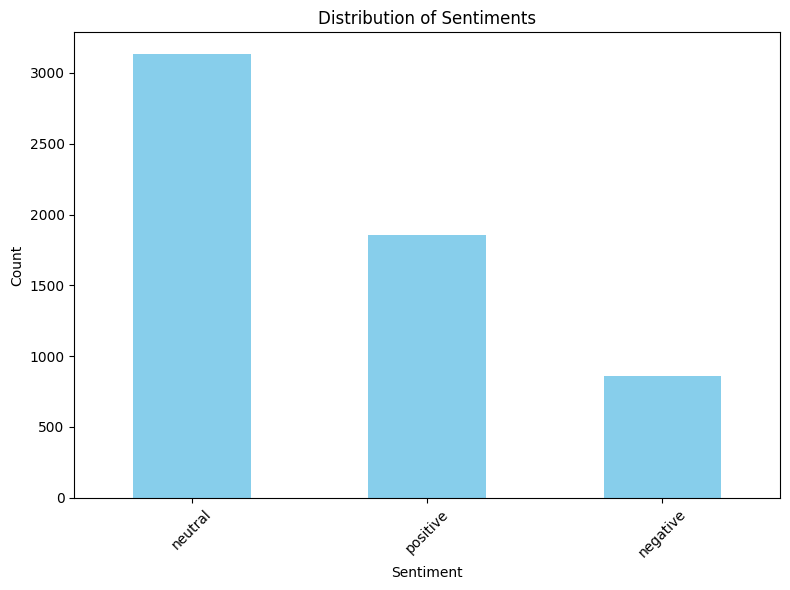

In [ ]:
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data.drop_duplicates(inplace=True) # Drop duplicates

data.dropna(inplace=True) # Handle missing values (if any)

stop_words = set(stopwords.words('english')) # Text preprocessing
def preprocess_text(text): # Tokenize the text

    tokens = word_tokenize(text) # Convert to lowercase

    tokens = [word.lower() for word in tokens] # Remove punctuation

    tokens = [word for word in tokens if word not in string.punctuation] # Remove stopwords

    tokens = [word for word in tokens if word not in stop_words] # Join tokens back into string

    return " ".join(tokens)

# Apply preprocessing to the 'Sentence' column
data['Processed_Text'] = data['Sentence'].apply(preprocess_text)


In [ ]:
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


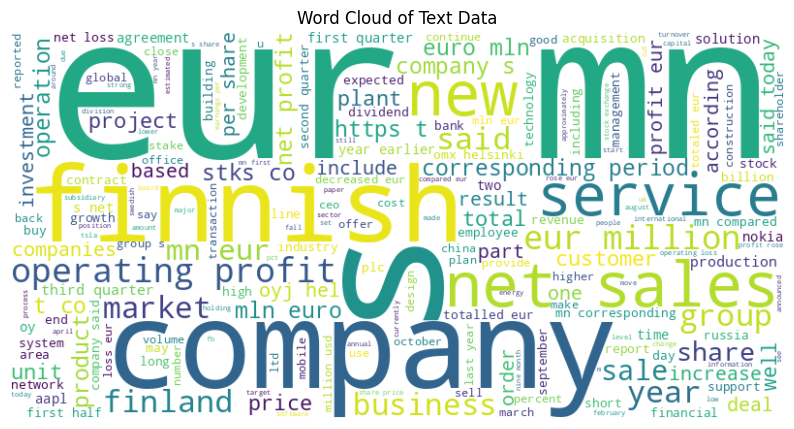

In [ ]:
# Combine all sentences into a single string
all_text = ' '.join(data['Processed_Text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Text Data')
plt.axis('off')
plt.show()

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Processed_Text'])
y = data['Sentiment']
print(X)
print(y)
print(vectorizer.vocabulary_)

  (0, 6733)	0.17954916959079859
  (0, 2499)	0.18341229199498804
  (0, 7860)	0.2480311054674892
  (0, 6981)	0.11784961622831532
  (0, 2691)	0.19038921724393984
  (0, 6850)	0.23970833553654758
  (0, 8445)	0.2279780501522395
  (0, 7732)	0.2079249948369898
  (0, 2521)	0.23970833553654758
  (0, 9017)	0.2279780501522395
  (0, 1589)	0.14036156288175375
  (0, 6216)	0.420884545118379
  (0, 8069)	0.19314658301173904
  (0, 9443)	0.1474660288668418
  (0, 4730)	0.2279780501522395
  (0, 1675)	0.2131996383269887
  (0, 6090)	0.23970833553654758
  (0, 10052)	0.2967498267112729
  (0, 4636)	0.2480311054674892
  (1, 7834)	0.413994507231688
  (1, 8291)	0.270146744163892
  (1, 1755)	0.413994507231688
  (1, 532)	0.525172524911496
  (1, 6282)	0.3470524618936306
  (1, 3743)	0.43357380035385745
  :	:
  (5834, 5057)	0.3724396121108206
  (5834, 3015)	0.27277867697821645
  (5834, 10339)	0.3319399779846105
  (5834, 6725)	0.2088625841806927
  (5834, 1989)	0.30008983388428445
  (5834, 3783)	0.17137625774224843
  (583

# **Naive Bayes**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb_model.predict(X_test)
print(f"accuracy score:{accuracy_score(y_test, y_pred)}")
print(f"precision score:{precision_score(y_test, y_pred, average='macro')}")
print(f"recall score:{recall_score(y_test, y_pred, average='macro')}")

accuracy score:0.6823630136986302
precision score:0.640687791173228
recall score:0.4783367447980463


In [ ]:
# Định nghĩa lưới siêu tham số
param_grid = {
    'alpha': np.linspace(0,10,1000)
}

# Sử dụng GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In kết quả tốt nhất
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_}')

Best parameters: {'alpha': 0.3103103103103103}
Best cross-validation accuracy: 0.6703117433344579


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(f"accuracy score:{accuracy_score(y_test, y_pred)}")
print(f"precision score:{precision_score(y_test, y_pred, average='macro')}")
print(f"recall score:{recall_score(y_test, y_pred, average='macro')}")

accuracy score:0.6892123287671232
precision score:0.5626178601466704
recall score:0.5255291321906647


In [ ]:
X_use = vectorizer.transform([preprocess_text("The stock price increased!"), preprocess_text("Finnish plumbing and heating systems supplier Uponor 's net sales from continuing operations decreased by 9.4 % in 2008 to EUR 949.2 mn from EUR 1,047.4 mn in 2007")])
y_use = grid_search.best_estimator_.predict(X_use)
print(y_use)

['positive' 'neutral']


# **SVM**

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
scores = cross_val_score(svm, X_train, y_train, cv=5)
print(scores)

[0.68522484 0.68415418 0.66809422 0.66773848 0.67416935]


In [ ]:
o = svm.predict(vectorizer.transform([preprocess_text("The stock price increased!"), preprocess_text("Finnish plumbing and heating systems supplier Uponor 's net sales from continuing operations decreased by 9.4 % in 2008 to EUR 949.2 mn from EUR 1,047.4 mn in 2007")]))
print(o)

['positive' 'neutral']


In [ ]:
y_pred = svm.predict(X_test)
print(f"accuracy score:{accuracy_score(y_test, y_pred)}")
print(f"precision score:{precision_score(y_test, y_pred, average='macro')}")
print(f"recall score:{recall_score(y_test, y_pred, average='macro')}")

accuracy score:0.6943493150684932
precision score:0.5765922965922966
recall score:0.5311453430436873


In [ ]:
# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'poly']}

In [ ]:
svm_model = SVC()

# Perform grid search with cross-validation
clf = GridSearchCV(svm_model, param_grid, cv=5)
clf.fit(X_train, y_train)


{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
# In kết quả tốt nhất
print(f'Best parameters: {clf.best_params_}')
print(f'Best cross-validation accuracy: {clf.best_score_}')
y_pred = clf.best_estimator_.predict(X_test)
print(f"accuracy score:{accuracy_score(y_test, y_pred)}")
print(f"precision score:{precision_score(y_test, y_pred, average='macro')}")
print(f"recall score:{recall_score(y_test, y_pred, average='macro')}")

Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation accuracy: 0.6758762115255295
accuracy score:0.6943493150684932
precision score:0.5765922965922966
recall score:0.5311453430436873


In [ ]:
y_pred = clf.best_estimator_.predict(X_test)
print(f"accuracy score:{accuracy_score(y_test, y_pred)}")
print(f"precision score:{precision_score(y_test, y_pred, average='macro')}")
print(f"recall score:{recall_score(y_test, y_pred, average='macro')}")

accuracy score:0.6943493150684932
precision score:0.5765922965922966
recall score:0.5311453430436873


# **LSTM**

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import string
from sklearn.metrics import confusion_matrix, classification_report

# **Tokenizer, tiền xử lý**

In [ ]:
# Remove duplicates based on the 'Sentence' column
df = df.drop_duplicates(subset='Sentence')

# Lowercase the sentences
df['Sentence'] = df['Sentence'].str.lower()

# Remove punctuation
df['Sentence'] = df['Sentence'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Tokenize the sentences
df['Sentence'] = df['Sentence'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Sentence'] = df['Sentence'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatize the words
lemmatizer = WordNetLemmatizer()
df['Sentence'] = df['Sentence'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

df

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low 150 250 bk real possibility,negative
2,last quarter 2010 componenta net sale doubled ...,positive
3,according finnishrussian chamber commerce majo...,neutral
4,swedish buyout firm sold remaining 224 percent...,neutral
...,...,...
5835,hsbc say unit book 585 million charge settlement,negative
5836,daily mail parent company talk potential partn...,positive
5838,nordic walking first used summer training meth...,neutral
5839,according shipping company viking line eu deci...,neutral


In [ ]:
# The number of most frequent words to consider
MAX_NB_WORDS = 50000
# Max number of words in each complaint
MAX_SEQUENCE_LENGTH = 250
# This is fixed
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Sentence'].values)
word_index = tokenizer.word_index
print(word_index)
X = tokenizer.texts_to_sequences(df['Sentence'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print(X)

{'eur': 1, 'company': 2, 'sale': 3, 'mn': 4, 'share': 5, 'said': 6, 'finnish': 7, 'profit': 8, 'million': 9, 'net': 10, 'year': 11, 'group': 12, 'finland': 13, 'market': 14, 'service': 15, 'operating': 16, 'mln': 17, '2009': 18, 'new': 19, 'business': 20, '2008': 21, 'period': 22, 'quarter': 23, '2007': 24, '2010': 25, 'euro': 26, 'oyj': 27, 'also': 28, 'first': 29, 'today': 30, 'loss': 31, 'price': 32, 'product': 33, '2006': 34, 'operation': 35, 'contract': 36, 'solution': 37, 'helsinki': 38, 'stock': 39, 'total': 40, 'compared': 41, 'bank': 42, 'plant': 43, 'order': 44, 'percent': 45, 'unit': 46, 'system': 47, 'per': 48, 'financial': 49, 'customer': 50, 'investment': 51, 'nokia': 52, 'technology': 53, 'corresponding': 54, 'corporation': 55, 'result': 56, 'capital': 57, 'project': 58, 'well': 59, 'according': 60, 'increase': 61, 'mobile': 62, 'report': 63, 'value': 64, 'production': 65, 'increased': 66, 'deal': 67, 'rose': 68, 'hel': 69, 'agreement': 70, '2005': 71, 'plc': 72, 'board'

In [ ]:
# Convert sentiments to one-hot vectors
encoder = LabelEncoder()
encoder.fit(df['Sentiment'])
Y = encoder.transform(df['Sentiment'])
Y = to_categorical(Y)
Y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

# **Train, test data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = 42)

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=250))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # 3 is the number of sentiment classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 250, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 5080703 (19.38 MB)
Trainable params: 5080703 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
68/68 [==============================] - 139s 2s/step - loss: 0.0573 - accuracy: 0.9810 - val_loss: 1.2771 - val_accuracy: 0.7286
Epoch 2/5
68/68 [==============================] - 112s 2s/step - loss: 0.0387 - accuracy: 0.9886 - val_loss: 1.2694 - val_accuracy: 0.7182
Epoch 3/5
68/68 [==============================] - 116s 2s/step - loss: 0.0401 - accuracy: 0.9858 - val_loss: 1.2526 - val_accuracy: 0.7015
Epoch 4/5
68/68 [==============================] - 112s 2s/step - loss: 0.0337 - accuracy: 0.9907 - val_loss: 1.5944 - val_accuracy: 0.7056
Epoch 5/5
68/68 [==============================] - 117s 2s/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 1.4968 - val_accuracy: 0.7056


In [ ]:
import pandas as pd
y_pred = model.predict(X_test)
labels = ['negative', 'neutral', 'positive']
y_pred = pd.DataFrame(np.array([np.argmax(p) for p in y_pred]))
Y_test_d = pd.DataFrame(np.array([np.argmax(p) for p in Y_test]))
print(f"accuracy score:{accuracy_score(Y_test_d, y_pred)}")
print(f"precision score:{precision_score(Y_test_d, y_pred, average='macro')}")
print(f"recall score:{recall_score(Y_test_d, y_pred, average='macro')}")

17/17 [==============================] - 3s 166ms/step
accuracy score:0.7030075187969925
precision score:0.6480059516695748
recall score:0.6164707201524963


In [ ]:
# Evaluate the model
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

17/17 [==============================] - 4s 239ms/step - loss: 1.1850 - accuracy: 0.7030
Test set
  Loss: 1.185
  Accuracy: 0.703


In [ ]:
text_to_predict = ["The stock price increased!", "Finnish plumbing and heating systems supplier Uponor 's net sales from continuing operations decreased by 9.4 % in 2008 to EUR 949.2 mn from EUR 1,047.4 mn in 2007 "]
sequences = tokenizer.texts_to_sequences(text_to_predict)
padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['negative', 'neutral', 'positive']
print("Predicted sentiment: ", [labels[np.argmax(p)] for p in pred])

1/1 [==============================] - 0s 106ms/step
Predicted sentiment:  ['positive', 'negative']
